In [59]:
import pandas as pd
import numpy as np

In [60]:
# load data
def load_data(path, method_name):
    df = pd.read_csv(path)
    mean_df = df.groupby(np.arange(len(df))//100).mean()
    mean_df["method"] = method_name
    return mean_df

In [61]:
# df = pd.read_csv(path)
# mean_df = df.groupby(np.arange(len(df))//10).mean()
# mean_df["method"] = "Base"

In [62]:
base_df = load_data('./base_res.csv', "Base")
laplacian_df = load_data('./laplacian_res.csv', "Laplacian")
vertical_df = load_data('./vertical_res.csv', "Vertical")

In [63]:
foo = pd.concat([base_df,laplacian_df,vertical_df])
foo

,reward,method
0,17.28,Base
1,17.28,Base
2,17.63,Base
3,16.98,Base
4,17.03,Base
5,17.42,Base
6,17.36,Base
7,17.24,Base
8,17.50,Base
9,17.44,Base


In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('reward ~ C(method)', data = foo).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df    sum_sq    mean_sq           F        PR(>F)
C(method)   2.0  37.74008  18.870040  444.892665  2.151778e-21
Residual   27.0   1.14520   0.042415         NaN           NaN


In [65]:
import scipy.stats as stats

In [66]:
stat, p = stats.f_oneway(foo['reward'][foo['method']=='Base'],
               foo['reward'][foo['method']=='Laplacian'],
               foo['reward'][foo['method']=='Vertical']
              )

In [67]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=444.893, p=0.000
Different distributions (reject H0)


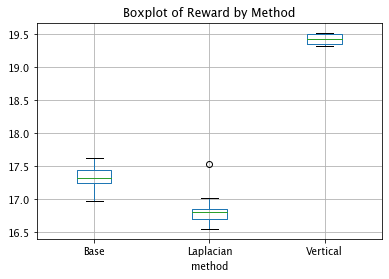

In [68]:
import matplotlib.pyplot as plt
foo.boxplot('reward', by = 'method')
plt.title("Boxplot of Reward by Method")
plt.suptitle('') # that's what you're after
fig1 = plt.gcf()
plt.show()
fig1.savefig("boxplot.png")